In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
import os
corpus=[]
for filepath,dirnames,filenames in os.walk(r'.\20_newsgroups\alt.atheism'):
    for filename in filenames:
        print (os.path.join(filepath,filename))
        with open(os.path.join(filepath,filename),encoding='gb18030',errors='ignore') as f:
            for l in f.readlines():
                corpus.append(l)
corpus

.\20_newsgroups\alt.atheism\49960
.\20_newsgroups\alt.atheism\51060
.\20_newsgroups\alt.atheism\51119
.\20_newsgroups\alt.atheism\51120
.\20_newsgroups\alt.atheism\51121
.\20_newsgroups\alt.atheism\51122
.\20_newsgroups\alt.atheism\51123
.\20_newsgroups\alt.atheism\51124
.\20_newsgroups\alt.atheism\51125
.\20_newsgroups\alt.atheism\51126
.\20_newsgroups\alt.atheism\51127
.\20_newsgroups\alt.atheism\51128
.\20_newsgroups\alt.atheism\51129
.\20_newsgroups\alt.atheism\51130
.\20_newsgroups\alt.atheism\51131
.\20_newsgroups\alt.atheism\51132
.\20_newsgroups\alt.atheism\51133
.\20_newsgroups\alt.atheism\51134
.\20_newsgroups\alt.atheism\51135
.\20_newsgroups\alt.atheism\51136
.\20_newsgroups\alt.atheism\51137
.\20_newsgroups\alt.atheism\51138
.\20_newsgroups\alt.atheism\51139
.\20_newsgroups\alt.atheism\51140
.\20_newsgroups\alt.atheism\51141
.\20_newsgroups\alt.atheism\51142
.\20_newsgroups\alt.atheism\51143
.\20_newsgroups\alt.atheism\51144
.\20_newsgroups\alt.atheism\51145
.\20_newsgroup

['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\n',
 'Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\n',
 'From: mathew <mathew@mantis.co.uk>\n',
 'Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\n',
 'Subject: Alt.Atheism FAQ: Atheist Resources\n',
 'Summary: Books, addresses, music -- anything related to atheism\n',
 'Keywords: FAQ, atheism, books, music, fiction, addresses, contacts\n',
 'Message-ID: <19930329115719@mantis.co.uk>\n',
 'Date: Mon, 29 Mar 1993 11:57:19 GMT\n',
 'Expires: Thu, 29 Apr 1993 11:57:19 GMT\n',
 'Followup-To: alt.atheism\n',
 'Distribution: world\n',
 'Organization: Mantis Consultants, Cambridge. UK.\n',
 'Approved: news-answers-request@mit.edu\n',
 'Supersedes: <19930301143317@mantis.co.uk>\n',
 'Lines: 290\n',

In [20]:
'''
    2、计算tf-idf设为权重
'''

vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

''' 
    3、获取词袋模型中的所有词语特征
    如果特征数量非常多的情况下可以按照权重降维
'''

word = vectorizer.get_feature_names()
print("word feature length: {}".format(len(word)))

''' 
    4、导出权重，到这边就实现了将文字向量化的过程，矩阵中的每一行就是一个文档的向量表示
'''
tfidf_weight = tfidf.toarray()

'''
    5、对向量进行聚类
'''

# 指定分成7个类
kmeans = KMeans(n_clusters=7)
kmeans.fit(tfidf_weight)

# 打印出各个族的中心点
print(kmeans.cluster_centers_)
for index, label in enumerate(kmeans.labels_, 1):
    print("index: {}, label: {}".format(index, label))

# 样本距其最近的聚类中心的平方距离之和，用来评判分类的准确度，值越小越好
# k-means的超参数n_clusters可以通过该值来评估
print("inertia: {}".format(kmeans.inertia_))

word feature length: 19868
[[-3.25260652e-19 -2.16840434e-19  1.69406589e-21 ...  1.43995601e-20
  -4.06575815e-20 -8.47032947e-21]
 [ 9.90612385e-05  2.11419424e-18  8.93013818e-05 ...  2.45639555e-20
   6.73371117e-04 -1.86347248e-20]
 [-4.33680869e-19 -2.16840434e-19  1.69406589e-21 ...  1.27054942e-20
  -2.71050543e-20 -8.47032947e-21]
 ...
 [ 1.85842268e-03  5.42101086e-20 -1.69406589e-21 ...  1.69406589e-21
   1.35525272e-20  3.38813179e-21]
 [ 1.63409522e-03  4.58793850e-04 -2.32087028e-19 ...  1.54199605e-05
   1.62630326e-18 -1.79570985e-19]
 [-1.08420217e-19 -2.71050543e-19  5.08219768e-21 ...  1.43995601e-20
  -8.13151629e-20 -1.18584613e-20]]
index: 1, label: 5
index: 2, label: 6
index: 3, label: 1
index: 4, label: 0
index: 5, label: 5
index: 6, label: 5
index: 7, label: 5
index: 8, label: 1
index: 9, label: 5
index: 10, label: 5
index: 11, label: 0
index: 12, label: 5
index: 13, label: 5
index: 14, label: 1
index: 15, label: 5
index: 16, label: 2
index: 17, label: 5
index:

c:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TypeError: got an unexpected keyword argument 'aspect'

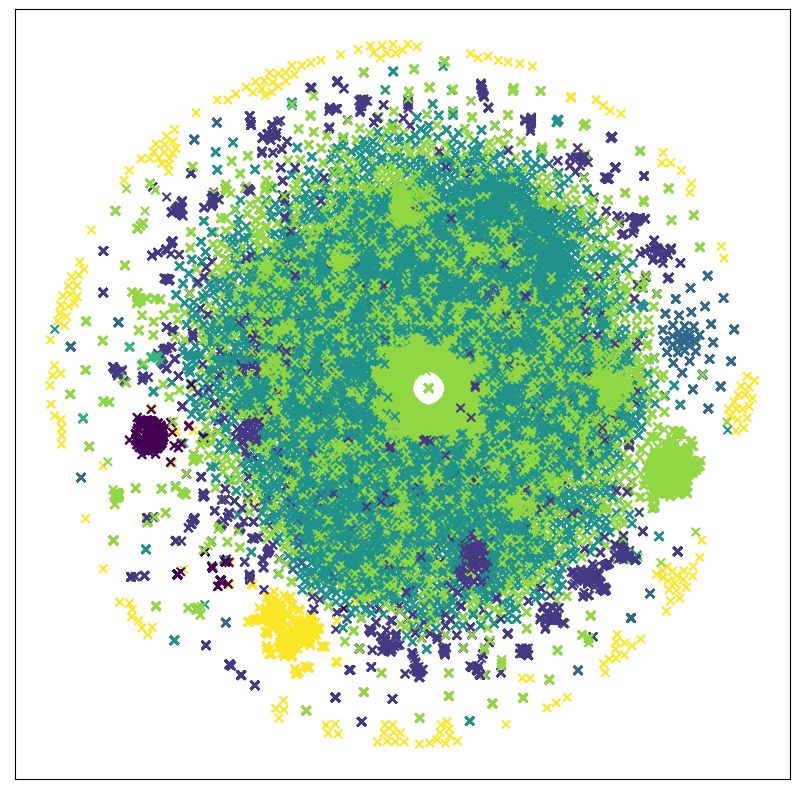

In [21]:
'''
    6、可视化
'''

# 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmeans.labels_, marker="x")
plt.xticks(())
plt.yticks(())
# plt.show()
plt.savefig('./sample.png', aspect=1)